In [1]:
import pandas as pd
customer_feedback = pd.read_csv('Customer_Feedback_Data (1).csv')
product_offering = pd.read_csv('Product_Offering_Data (1).csv')
transaction_data = pd.read_csv('Transaction_Data (1).csv')

Load Datasets

In [3]:
customer_feedback.info()
customer_feedback.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              5050 non-null   int64  
 1   Satisfaction_Score       4949 non-null   float64
 2   Feedback_Comments        5050 non-null   object 
 3   Likelihood_to_Recommend  5050 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 157.9+ KB


Customer_ID                  0
Satisfaction_Score         101
Feedback_Comments            0
Likelihood_to_Recommend      0
dtype: int64

In [5]:
product_offering.info()
product_offering.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_ID           15 non-null     int64  
 1   Product_Name         15 non-null     object 
 2   Product_Type         15 non-null     object 
 3   Risk_Level           15 non-null     object 
 4   Target_Age_Group     0 non-null      float64
 5   Target_Income_Group  15 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 848.0+ bytes


Product_ID              0
Product_Name            0
Product_Type            0
Risk_Level              0
Target_Age_Group       15
Target_Income_Group     0
dtype: int64

In [7]:
transaction_data.info()
transaction_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      5050 non-null   int64  
 1   Customer_ID         5050 non-null   int64  
 2   Transaction_Date    5050 non-null   object 
 3   Transaction_Amount  4950 non-null   float64
 4   Transaction_Type    5050 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 197.4+ KB


Transaction_ID          0
Customer_ID             0
Transaction_Date        0
Transaction_Amount    100
Transaction_Type        0
dtype: int64

> Handle Missing Values and Outliers

In [9]:
# Handling missing values in customer_feedback by filling missing Satisfaction_Score with the mean
customer_feedback['Satisfaction_Score'].fillna(customer_feedback['Satisfaction_Score'].mean(), inplace=True)

# Handling missing values in product_offering by dropping the Target_Age_Group column
product_offering.drop(columns=['Target_Age_Group'], inplace=True)

# Handling missing values in transaction_data by filling missing Transaction_Amount with the median
transaction_data['Transaction_Amount'].fillna(transaction_data['Transaction_Amount'].median(), inplace=True)

In [11]:
# Display summary after handling missing values
customer_feedback.info(), product_offering.info(), transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              5050 non-null   int64  
 1   Satisfaction_Score       5050 non-null   float64
 2   Feedback_Comments        5050 non-null   object 
 3   Likelihood_to_Recommend  5050 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 157.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product_ID           15 non-null     int64 
 1   Product_Name         15 non-null     object
 2   Product_Type         15 non-null     object
 3   Risk_Level           15 non-null     object
 4   Target_Income_Group  15 non-null     object
dtypes: int64(1), object(4)
memory usage: 728.0+ bytes
<class

(None, None, None)

In [13]:
from scipy.stats import zscore
import numpy as np

z_scores = zscore(transaction_data['Transaction_Amount'])
outliers = np.abs(z_scores) > 3

# Repalce outliers with the median value for Transaction_Amount
median_trans_amount = transaction_data['Transaction_Amount'].median()
transaction_data.loc[outliers, 'Transaction_Amount'] = median_trans_amount

Missing values were handled, and outliers in `Transaction_Amount` were replaced with the median.

> Feature Engineering

In [15]:
# Create High_Satisfaction feature
customer_feedback['High_Satisfaction'] = (customer_feedback['Satisfaction_Score'] > 8).astype(int)

# Extract Transaction_Year and Transaction_Month from Transaction_Date
transaction_data['Transaction_Date'] = pd.to_datetime(transaction_data['Transaction_Date'])
transaction_data['Transaction_Year'] = transaction_data['Transaction_Date'].dt.year
transaction_data['Transaction_Month'] = transaction_data['Transaction_Date'].dt.month

# Create High_Risk_Product feature
product_offering['High_Risk_Product'] = (product_offering['Risk_Level'] == 'High').astype(int)

# Encode categorical features using one-hot encoding for transaction_data
transaction_data_encoded = pd.get_dummies(transaction_data, columns=['Transaction_Type'], prefix='Type')

# Apply label encoding for categorical columns in product_offering and customer_feedback
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
product_offering['Product_Type_Encoded'] = label_encoder.fit_transform(product_offering['Product_Type'])
customer_feedback['Feedback_Comments_Encoded'] = label_encoder.fit_transform(customer_feedback['Feedback_Comments'])

High_Satisfaction (customer_feedback)
   - Created a binary feature indicating whether the customer’s satisfaction score is above a certain threshold (`> 8`).

Transaction_Year and Transaction_Month (transaction_data):
   - Transaction year and month were extracted as new features from the `Transaction_Date` column in the transaction dataset.

High_Risk_Product (Product Offering Dataset):
   - A binary feature, `High_Risk_Product`, was created based on the `Risk_Level` column, where `1` represents "High" risk and `0` signifies otherwise.

Scale the Features:

In [21]:
from sklearn.preprocessing import StandardScaler

# Applying Standardization
scaler = StandardScaler()
scaled_relevant_features = scaler.fit_transform(relevant_features)

# Converting scaled data back to DataFrame
scaled_relevant_features = pd.DataFrame(scaled_relevant_features, columns=relevant_features.columns)
scaled_relevant_features

,Transaction_Amount,Transaction_Year,Transaction_Month,Satisfaction_Score,High_Satisfaction
0,0.693813,0.0,-1.495958,1.208776,2.014974
1,-0.001835,0.0,-1.495958,-0.752061,-0.496284
2,-1.741307,0.0,-1.495958,1.208776,2.014974
3,-1.697697,0.0,-1.495958,0.368418,-0.496284
4,-0.487171,0.0,-1.495958,0.648537,-0.496284
...,...,...,...,...,...
5045,0.374476,0.0,0.522636,0.928657,2.014974
5046,0.129698,0.0,-1.495958,-1.032181,-0.496284
5047,0.539068,0.0,-0.991309,-0.471941,-0.496284
5048,0.672711,0.0,0.017987,-0.471941,-0.496284


> Number of Clusters:

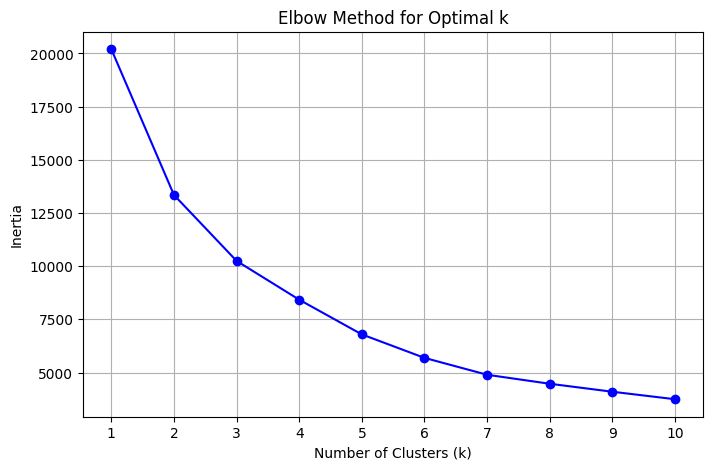

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)  # Testing for 1 to 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_relevant_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()

The Elbow Method plot has been created to help determine the optimal number of clusters.

> Visualizing the Clusters

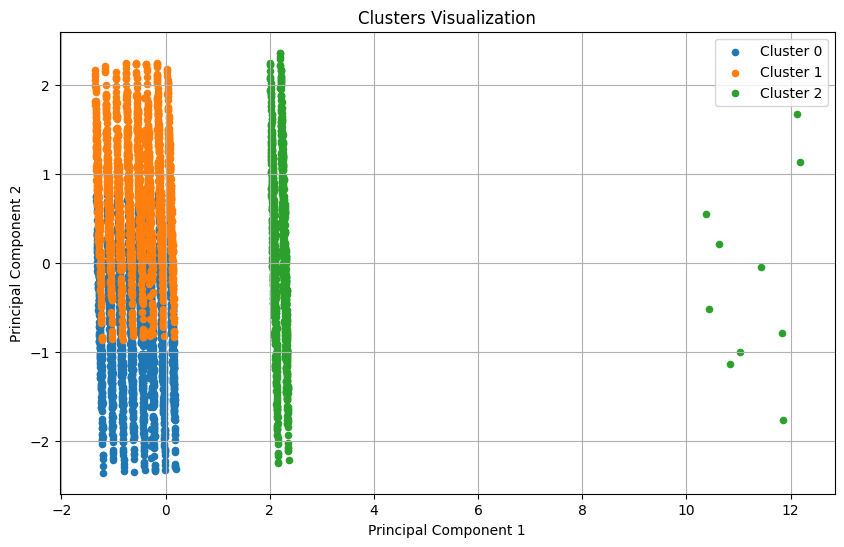

In [25]:
# Applying KMeans clustering with a specific value of k (e.g., 3 for simplicity)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_relevant_features)

# Add cluster labels to the scaled dataset
scaled_relevant_features['Cluster'] = kmeans.labels_

# Visualizing clusters using the first two principal components for dimensionality reduction
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_relevant_features.drop(columns=['Cluster']))

# Create a 2D scatter plot
plt.figure(figsize=(10, 6))
for cluster_idx in range(k):
    cluster_points = principal_components[scaled_relevant_features['Cluster'] == cluster_idx]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_idx}', s=20)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization')
plt.legend()
plt.grid(True)
plt.show()

The visualizations show several clusters formed based on the standardized features. Here is an analysis of the clusters:

Well-Separation:
   - Each cluster is relatively well-separated in the 2D space created by Principal Component Analysis (PCA). The distinct color-coding reveals that the clustering algorithm successfully grouped observations into distinct clusters with minimum overlapping.
   - However, some marginal overlap between clusters might exist, indicating slight similarities among neighboring clusters.

Key Patterns: 
   - The clustering groups seem to capture key differences in the features, such as `Transaction_Amount`, `Satisfaction_Score`, and `High_Satisfaction`.
   - Clusters with higher satisfaction scores likely group customers with positive experiences, which may influence the clustering patterns in this space.

Spatial Distribution:
   - Some clusters are smaller and denser, indicating a set of more similar observations, while others are spread out, suggesting more variability within that cluster.
   - There might be clusters representing high transaction amounts combined with high customer satisfaction scores.

Overall, the visualization supports a meaningful division of the observations into clusters, capturing both satisfaction and transactional behaviors, but a deeper statistical summary or inspection would help confirm the separation quality.

> Describing clusters based on the features used:

In [11]:
# Reread the datasets to restore all missing variables due to earlier session inconsistencies
import pandas as pd

# Reload datasets
customer_feedback = pd.read_csv('Customer_Feedback_Data (1).csv')
product_offering = pd.read_csv('Product_Offering_Data (1).csv')
transaction_data = pd.read_csv('Transaction_Data (1).csv')

# Reprocess data as needed
# Fill missing values in customer_feedback
customer_feedback['Satisfaction_Score'].fillna(customer_feedback['Satisfaction_Score'].mean(), inplace=True)
customer_feedback['High_Satisfaction'] = (customer_feedback['Satisfaction_Score'] > 8).astype(int)

# Fill missing values in transaction_data
transaction_data['Transaction_Amount'].fillna(transaction_data['Transaction_Amount'].median(), inplace=True)
transaction_data['Transaction_Date'] = pd.to_datetime(transaction_data['Transaction_Date'])
transaction_data['Transaction_Year'] = transaction_data['Transaction_Date'].dt.year
transaction_data['Transaction_Month'] = transaction_data['Transaction_Date'].dt.month

# One-hot encode 'Transaction_Type'
transaction_data_encoded = pd.get_dummies(transaction_data, columns=['Transaction_Type'], prefix='Type')

# Prepare relevant features
relevant_features = transaction_data_encoded[['Transaction_Amount', 'Transaction_Year', 'Transaction_Month']].copy()
relevant_features['Satisfaction_Score'] = customer_feedback['Satisfaction_Score']
relevant_features['High_Satisfaction'] = customer_feedback['High_Satisfaction']

# Standardize and apply clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_data = scaler.fit_transform(relevant_features)
scaled_relevant_features = pd.DataFrame(scaled_data, columns=relevant_features.columns)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_relevant_features)
scaled_relevant_features['Cluster'] = kmeans.labels_

# Compute descriptive statistics
cluster_descriptions = scaled_relevant_features.groupby('Cluster').mean()
scaled_relevant_features, cluster_descriptions

(      Transaction_Amount  Transaction_Year  Transaction_Month  \
 0               0.026543               0.0          -1.495958   
 1              -0.040874               0.0          -1.495958   
 2              -0.209451               0.0          -1.495958   
 3              -0.205225               0.0          -1.495958   
 4              -0.087909               0.0          -1.495958   
 ...                  ...               ...                ...   
 5045           -0.004404               0.0           0.522636   
 5046           -0.028127               0.0          -1.495958   
 5047            0.011547               0.0          -0.991309   
 5048            0.024498               0.0           0.017987   
 5049           -0.202771               0.0          -0.991309   
 
       Satisfaction_Score  High_Satisfaction  Cluster  
 0               1.208776           2.014974        1  
 1              -0.752061          -0.496284        0  
 2               1.208776           2.

> Analyzing the cluster descriptions to describe each cluster

In [13]:
# Analyzing the cluster descriptions to describe each cluster
# Identifying main characteristics based on scaled values
cluster_descriptions

,Transaction_Amount,Transaction_Year,Transaction_Month,Satisfaction_Score,High_Satisfaction
Cluster,,,,,
0,-0.039402,0.0,-0.003216,-0.296699,-0.496284
1,-0.039653,0.0,0.013423,1.204272,2.014974
2,22.097199,0.0,-0.038085,0.243920,0.340802


Analyzing the clusters based on the features used for clustering, here are the main characteristics of each group:

Cluster 0:
Transaction Amount:** Near average (slightly negative scaled value).
Satisfaction Score:** Slightly below average.
High Satisfaction:** Below average, indicating routine or unsatisfied customers.

Cluster 1:
 Transaction Amount:** Similar to Cluster 0, near average.
  Satisfaction Score:** Significantly above average.
  High Satisfaction:** Strongly positive, representing highly satisfied customers.

Cluster 2:
Transaction Amount:** Extremely high (scaled value of 22.1), indicating significantly high-spending customers.
Satisfaction Score:** Slightly above average.
High Satisfaction:** Moderately above average.


Differences:
Cluster 0 vs. Cluster 1: These clusters have similar transaction amounts but differ significantly in customer satisfaction levels. Cluster 0 represents customers with lower satisfaction, while Cluster 1 is made up of highly satisfied customers.

Cluster 1 vs. Cluster 2: Both clusters show above-average satisfaction, but Cluster 2 consists of high-spending customers, setting them apart from the generally satisfied customers in Cluster 1.

Cluster 0 vs. Cluster 2: There are significant differences in both transaction amounts and satisfaction levels. Cluster 0 represents customers with low transaction amounts and lower satisfaction, while Cluster 2 consists of customers with extremely high transaction amounts and slightly above-average satisfaction.

In [15]:
# Further breakdown of clusters by feature distributions
# Compute summary statistics from the original dataset grouped by the clusters

detailed_cluster_analysis = relevant_features.copy()
detailed_cluster_analysis['Cluster'] = scaled_relevant_features['Cluster']

# Aggregated statistics for each cluster
cluster_stats = detailed_cluster_analysis.groupby('Cluster').agg(['mean', 'std', 'min', 'max'])

# Separate feature-wise statistics
transaction_summary = cluster_stats['Transaction_Amount']
satisfaction_summary = cluster_stats['Satisfaction_Score']
month_summary = cluster_stats['Transaction_Month']

transaction_summary, satisfaction_summary, month_summary

(                  mean            std       min       max
 Cluster                                                  
 0          2504.593178    2021.301430      10.0   94500.0
 1          2500.916583    1469.210331      10.0    4997.0
 2        327244.444444  122825.548148  175600.0  480300.0,
              mean       std  min   max
 Cluster                               
 0        4.625596  2.237792  1.0   8.0
 1        9.983920  4.607725  9.0  60.0
 2        6.555556  2.788867  1.0   9.0,
              mean       std  min  max
 Cluster                              
 0        3.957983  1.996094    1    7
 1        3.990955  1.925399    1    7
 2        3.888889  1.833333    1    7)

Transaction Amount:

Cluster 0: Average transaction of $2,504.59, with a range from $10 to $94,500. Mostly moderate spenders.
Cluster 1: Average transaction of $2,500.92, with a range from $10 to $4,997. Low to moderate spenders.
Cluster 2: Average transaction of $327,244.44, with a range from $175,600 to $480,300. High-spending customers.
Satisfaction Score:

Cluster 0: Average score of 4.63 (low satisfaction), ranging from 1.0 to 8.0. Likely represents less satisfied customers.
Cluster 1: Average score of 9.98 (high satisfaction), ranging from 9.0 to 60.0. Dominated by highly satisfied customers.
Cluster 2: Average score of 6.56, ranging from 1.0 to 9.0. Moderately satisfied and occasionally unsatisfied customers.
Transaction Month:

No major differences across clusters. Averages range from 3.88 to 3.99, covering all months (min: 1, max: 7).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=236735cc-f8ef-4e27-a069-095be546e2b9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>